<a href="https://colab.research.google.com/github/Sudipta-Mitra/HANDWRITTEN-DIGIT-DETECTION-/blob/main/handwritten_digit_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
print(train.head(1))
print(test.head(1))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  

[1 rows x 785 columns]
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  

[1 rows x 784 columns]


In [ ]:
print('train:', train.shape)
print('test:', test.shape)
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]
X_test = test.iloc[:, 0:784]
train: (42000, 785)
test: (28000, 784)

train: (42000, 785)
test: (28000, 784)


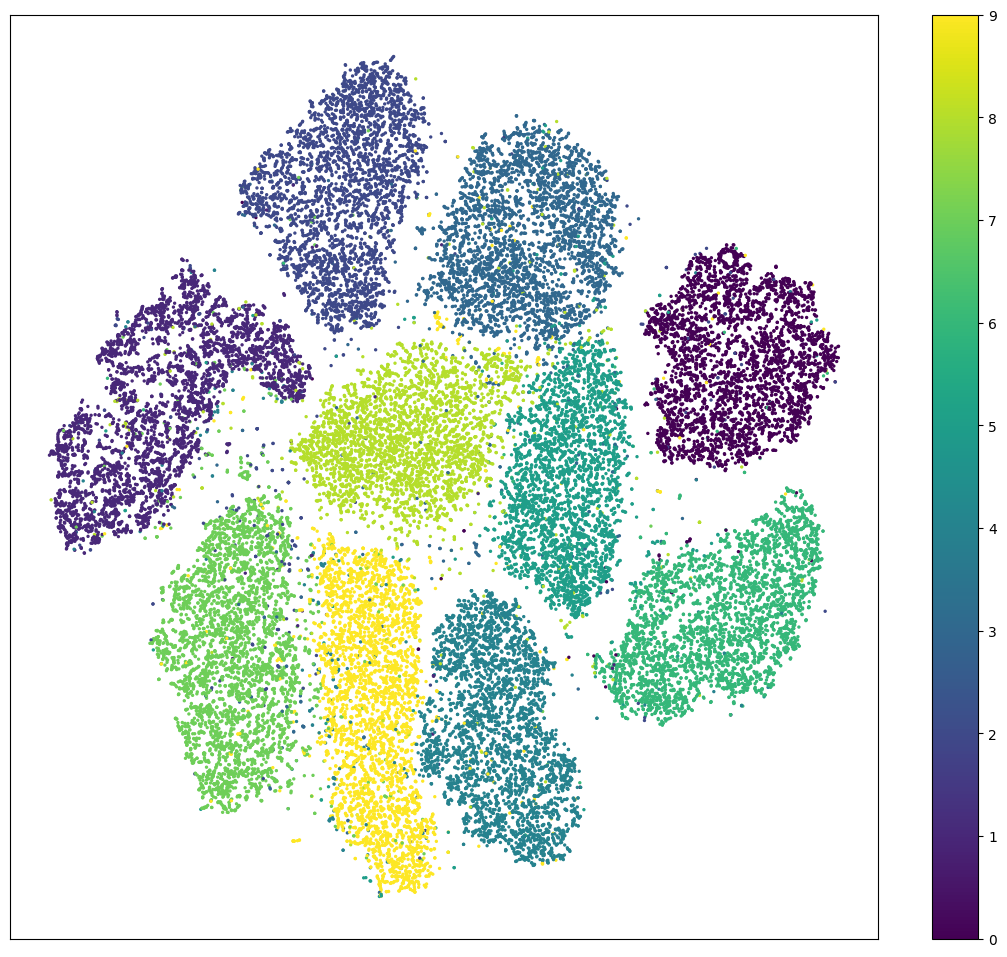

In [ ]:
X_tsn = X/255
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_res = tsne.fit_transform(X_tsn)
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y,
test_size = 0.2,random_state = 1212)

In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)
X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [ ]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
X_validation.to_numpy().reshape(X_validation.shape[0], 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

In [ ]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);
x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)
IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)
IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [ ]:
pd.DataFrame(x_train_re[0])
{"type":"dataframe"}

{'type': 'dataframe'}

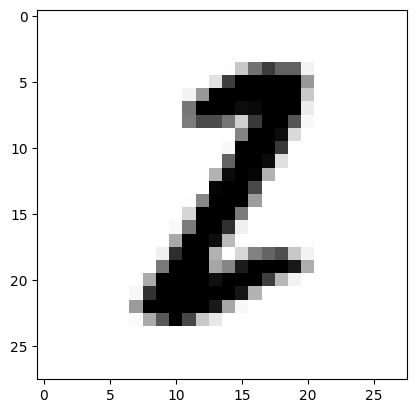

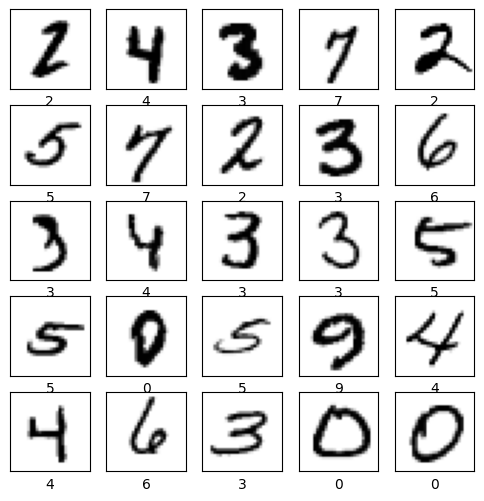

In [ ]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(6,6))
for i in range(numbers_to_display):
  plt.subplot(num_cells, num_cells, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train_re[i], cmap=plt.cm.binary)
  plt.xlabel(y_train_re[i])
plt.show()

In [ ]:
x_train_with_chanels = x_train_re.reshape(
x_train_re.shape[0],
IMAGE_WIDTH,
IMAGE_HEIGHT,
IMAGE_CHANNELS                                           )
x_validation_with_chanels = x_validation_re.reshape(
x_validation_re.shape[0],
IMAGE_WIDTH,
IMAGE_HEIGHT,
IMAGE_CHANNELS
)
x_test_with_chanels = x_test_re.reshape(
x_test_re.shape[0],
IMAGE_WIDTH,
IMAGE_HEIGHT,
IMAGE_CHANNELS
)
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)
x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [ ]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(
input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
kernel_size=5,
filters=8,
strides=1,
activation=tf.keras.activations.relu,
kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
pool_size=(2, 2),
strides=(2, 2)
))
model.add(tf.keras.layers.Convolution2D(
kernel_size=5,
filters=16,
strides=1,
activation=tf.keras.activations.relu,
kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
pool_size=(2, 2),
strides=(2, 2)
))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
units=128,
activation=tf.keras.activations.relu
));
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(
units=10,
activation=tf.keras.activations.softmax,
kernel_initializer=tf.keras.initializers.VarianceScaling()
))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

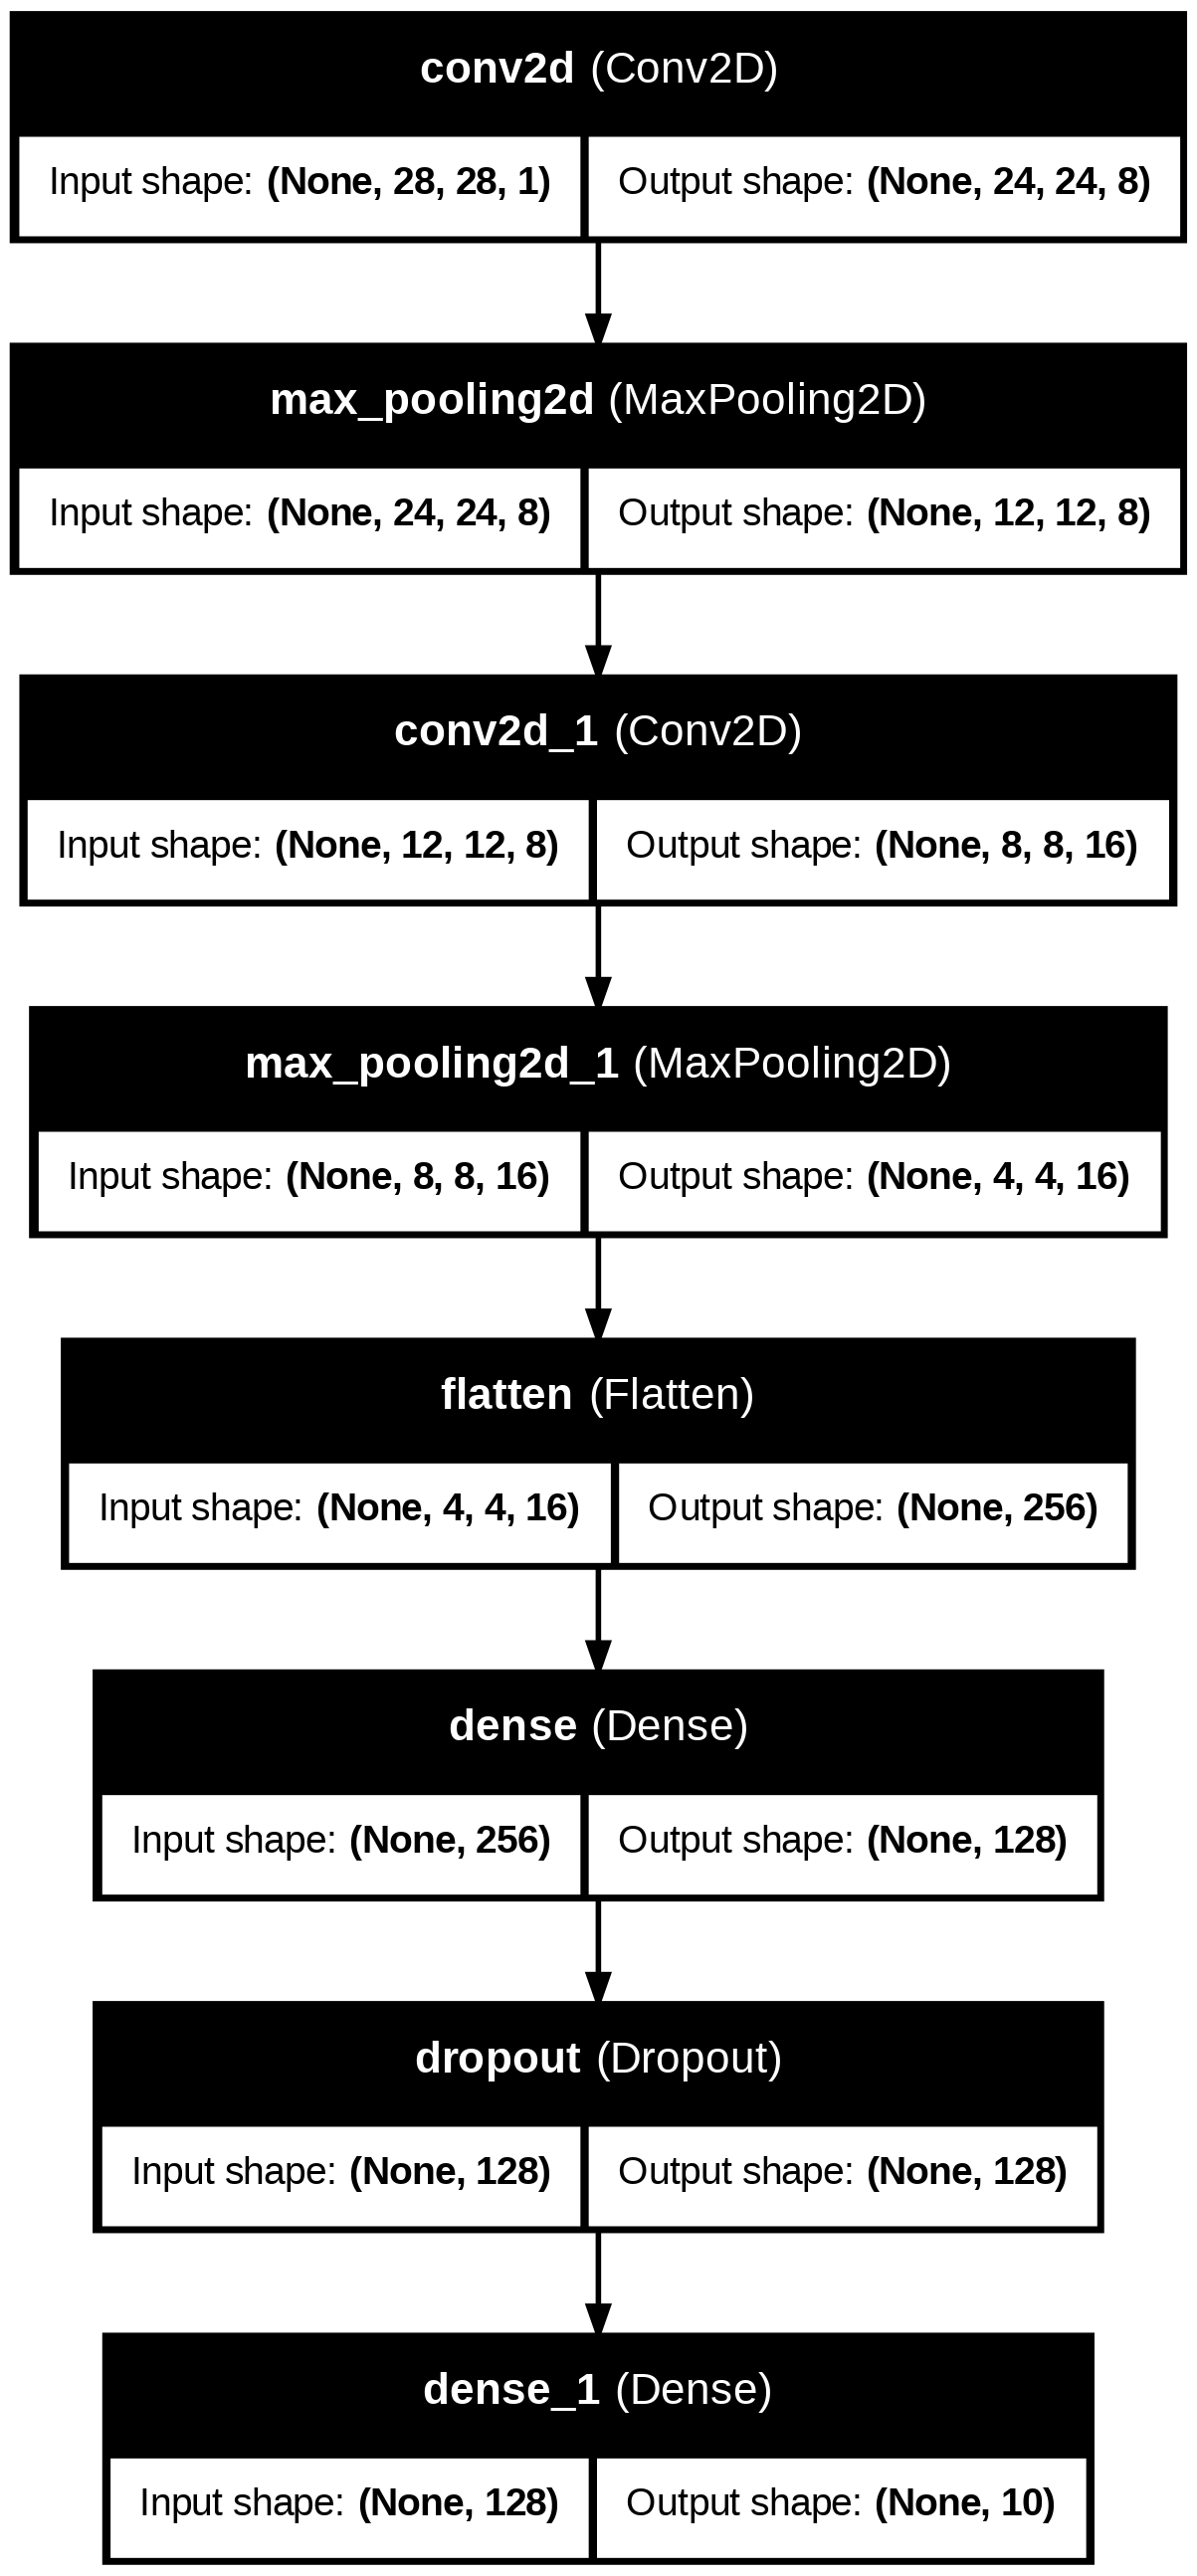

In [ ]:
tf.keras.utils.plot_model(
model,
show_shapes=True,
show_layer_names=True,
)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
optimizer=adam_optimizer,
loss=tf.keras.losses.sparse_categorical_crossentropy,
metrics=['accuracy']
)

In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,
histogram_freq=1)
training_history = model.fit(
x_train_normalized,
y_train_re,
epochs=10,
validation_data=(x_validation_normalized, y_validation_re),
callbacks=[tensorboard_callback]
)
print("The model has successfully trained")

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.8237 - loss: 0.5723 - val_accuracy: 0.9723 - val_loss: 0.0916
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9694 - loss: 0.0955 - val_accuracy: 0.9802 - val_loss: 0.0667
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9798 - loss: 0.0643 - val_accuracy: 0.9827 - val_loss: 0.0551
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9835 - loss: 0.0480 - val_accuracy: 0.9850 - val_loss: 0.0483
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9865 - loss: 0.0422 - val_accuracy: 0.9836 - val_loss: 0.0551
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9895 - loss: 0.0333 - val_accuracy: 0.9865 - val_loss: 0.0448
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9890 - loss: 0.0322 - val_accuracy: 0.9870 - val_loss: 0.0443
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9912 -

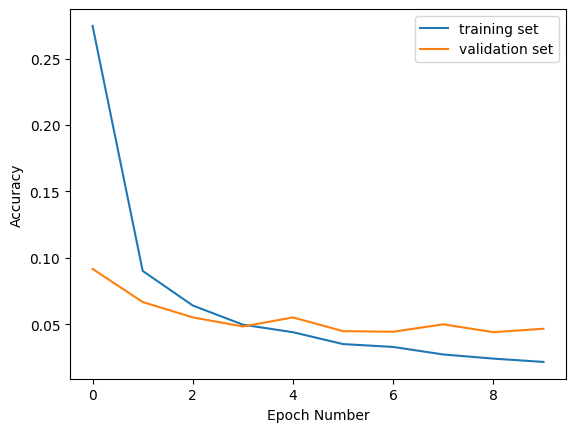

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

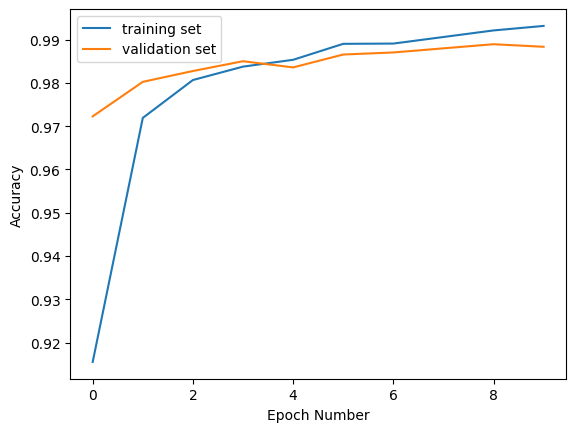

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train_normalized,y_train_re)
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9969 - loss: 0.0100
Train loss:  0.008246837183833122
Train accuracy:  0.9977083206176758


In [ ]:
validation_loss, validation_accuracy =model.evaluate(x_validation_normalized, y_validation_re)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9895 - loss: 0.0401
Validation loss:  0.046549901366233826
Validation accuracy:  0.9883333444595337


In [ ]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')
loaded_model = tf.keras.models.load_model(model_name)

  9/263 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step   

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


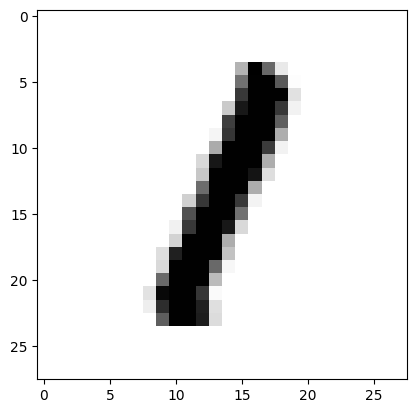

In [ ]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH,
IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

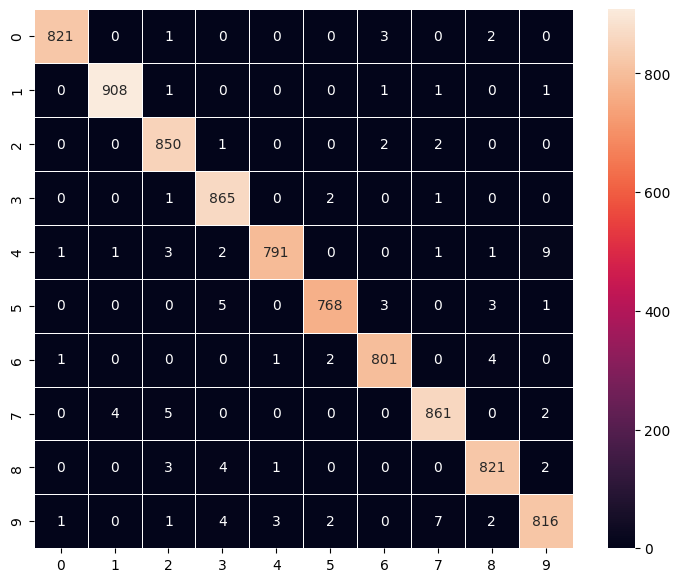

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re,
predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(confusion_matrix,annot=True,linewidths=.5,fmt="d",square=True,ax=ax)
plt.show()